In [1]:
import cv2

In [2]:
from matplotlib import pyplot as plt

In [3]:
import numpy as np

In [4]:
img = cv2.imread('.//iris2.jpg')

In [5]:
cimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

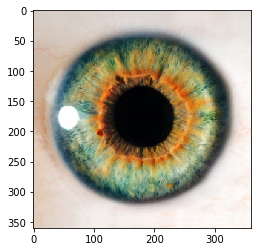

In [6]:
plt.imshow(cimg)

In [7]:
plt.gray()

<Figure size 432x288 with 0 Axes>

In [8]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

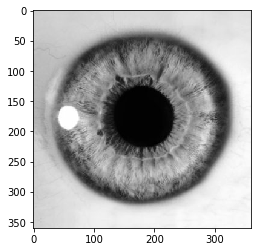

In [9]:
plt.imshow(img)

In [10]:
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,60,
                            param1=50,param2=30,minRadius=140, maxRadius=180)

In [11]:
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

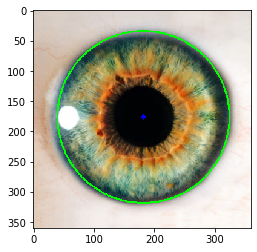

In [12]:
plt.imshow(cimg)

In [13]:
iris = circles[0][0]
irisX = iris[0]
irisY = iris[1]
irisRaio = iris[2]

In [14]:
rectX = (irisX - irisRaio) 
rectY = (irisY - irisRaio)
iris_img = img[rectY:(rectY + 2 * irisRaio), rectX:(rectX + 2 * irisRaio)]

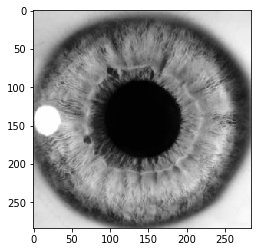

In [15]:
plt.imshow(iris_img)

In [16]:
#x, tresh = cv2.threshold(iris_img, 15, 255,cv2.THRESH_BINARY)
#iris_img = tresh
#plt.imshow(iris_img)

In [17]:
#kernel = np.ones((15,15),np.uint8)
#iris_img = cv2.morphologyEx(iris_img, cv2.MORPH_CLOSE, kernel)
#plt.imshow(iris_img)

In [18]:
#iris_img = cv2.medianBlur(iris_img, 5)
#plt.imshow(iris_img)

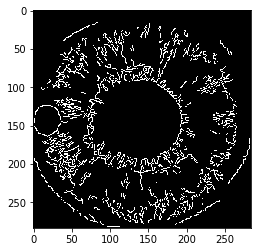

In [19]:
plt.imshow(cv2.Canny(iris_img, 100, 200))

In [20]:
pupila_img = cv2.cvtColor(iris_img, cv2.COLOR_GRAY2BGR)

In [21]:
pupilaCircles = cv2.HoughCircles(iris_img, cv2.HOUGH_GRADIENT, 1, 200,
                           param1=20, param2=20, minRadius=45, maxRadius=60)

In [22]:
pupilaCircles = np.uint16(np.around(pupilaCircles))
for i in pupilaCircles[0,:]:
    cv2.circle(pupila_img,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(pupila_img,(i[0],i[1]),2,(0,0,255),3)

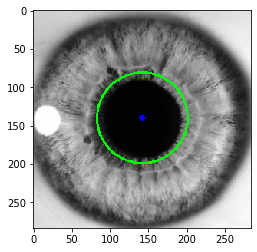

In [23]:
plt.imshow(pupila_img)

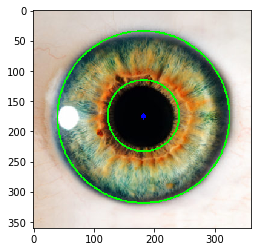

In [29]:
pupilaX, pupilaY, pupilaRaio = pupilaCircles[0][0]
pupilaX = rectX + pupilaX
pupilaY = rectY + pupilaY
cv2.circle(cimg,(pupilaX,pupilaY),pupilaRaio,(0,255,0),2)
cv2.circle(cimg,(pupilaX,pupilaY),2,(0,0,255),3)
plt.imshow(cimg)